In [10]:
# Standard import(s)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import random as rn
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split # Impobrt train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Keras import(s)
if float(tf.__version__[:3])>2.8:
    from tensorflow.keras.utils import plot_model
else:
    from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Embedding, GlobalAveragePooling1D,Conv1D,MaxPool1D,Dropout, Bidirectional ,UpSampling1D, SimpleRNN,LSTM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [12]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer




In [15]:
phrases = pd.read_pickle("clean_doc.pkl").iloc[:-1, :][0]

#create count array (sparse matrix)
vectorizer = CountVectorizer(max_features=8000)
vectorizerfit = vectorizer.fit_transform(phrases.astype(str))
names = vectorizer.get_feature_names()
count_array = vectorizerfit.toarray()
sparse = pd.DataFrame(data=count_array,columns=names)

# Transform to a TF-IDF encoding
TFIDF = sklearn.feature_extraction.text.TfidfTransformer()
phrases_TFIDF = TFIDF.fit_transform(sparse)



TypeError: 'tuple' object is not callable

In [18]:
y_labels =phrases.iloc[:-1:]
print(y_labels)

0                                                     [ala]
1                                               [brilliant]
2                                                  [c, mon]
3                         [gollum, performance, incredible]
4                 [oh, look, clever, angle, wow, jump, cut]
                                ...                        
149895    [zip, along, b, movie, verve, adding, rich, de...
149896                                             [zoning]
149897                                  [zoning, ordinance]
149898    [zoning, ordinance, protect, community, dulles...
149899                                          [zzzzzzzzz]
Name: 0, Length: 149900, dtype: object


In [ ]:
y_labels =phrases.iloc[:-1:][2]

x_train, x_test, y_train, y_test = train_test_split(phrases_TFIDF, y_labels, test_size=0.3, random_state=1) # 70% training and 30% test
print(x_train.shape,x_test.shape,y_train.ravel().shape)

In [14]:
inputs = Input(shape=(phrases_TFIDF[1]))
encoded_h1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(inputs)
encoded_h2 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(encoded_h1)
drop = Dropout(0.25)(encoded_h2)
encoded_h3 = Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h3)
encoded_h4 = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h4)
output = Dense(len(labels),activation='softmax')(drop)
dense_tfifd = Model(inputs,output)

dense_tfifd.summary()



NameError: name 'shape' is not defined

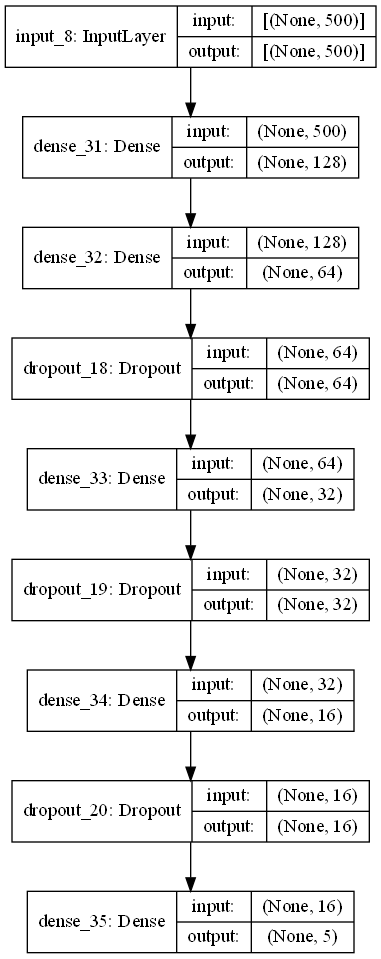

In [24]:
plot_model(dense_will, show_shapes=True)

In [25]:
dense_will.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

dense_w = dense_will.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 116024 samples, validate on 29007 samples
Epoch 1/20
116024/116024 [==============================] - 7s 62us/sample - loss: 1.3573 - acc: 0.4569 - val_loss: 1.3359 - val_acc: 0.4611
Epoch 2/20
116024/116024 [==============================] - 6s 54us/sample - loss: 1.3321 - acc: 0.4630 - val_loss: 1.3247 - val_acc: 0.4626
Epoch 3/20
116024/116024 [==============================] - 7s 57us/sample - loss: 1.3283 - acc: 0.4632 - val_loss: 1.3241 - val_acc: 0.4614
Epoch 4/20
116024/116024 [==============================] - 7s 57us/sample - loss: 1.3273 - acc: 0.4634 - val_loss: 1.3232 - val_acc: 0.4635
Epoch 5/20
116024/116024 [==============================] - 7s 58us/sample - loss: 1.3265 - acc: 0.4626 - val_loss: 1.3229 - val_acc: 0.4619
Epoch 6/20
116024/116024 [==============================] - 6s 54us/sample - loss: 1.3257 - acc: 0.4632 - val_loss: 1.3264 - val_acc: 0.4630
Epoch 7/20
116024/116024 [==============================] - 6s 52us/sample - loss: 1.3257 - acc: 0.4632

145031/145031 [==============================] - 4s 28us/sample - loss: 1.2977 - acc: 0.4757
Overall accuracy for training dataset: 47.56569266319275%
Overall accuracy for testing dataset: 47.661566734313965%


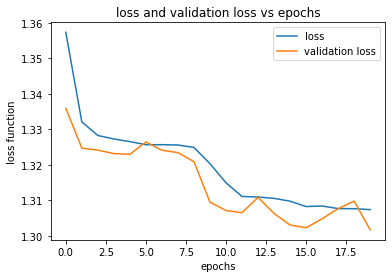

In [26]:
misc,testacc = dense_will.evaluate(x_test,y_test)
misc,trainacc = dense_will.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(dense_w.history['loss'],label="loss")
plt.plot(dense_w.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

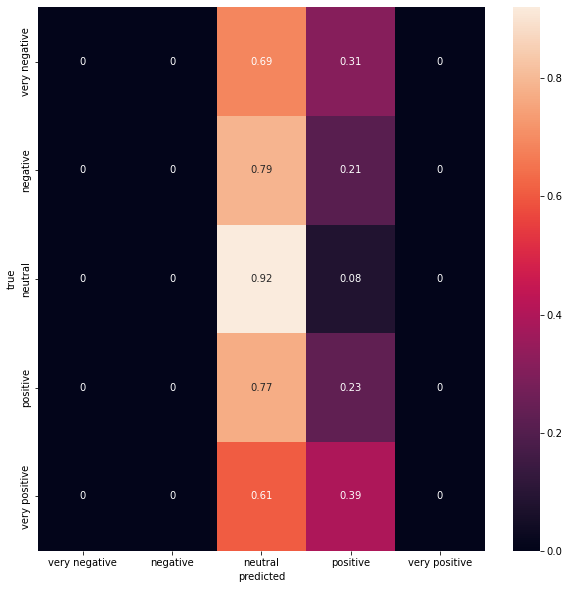

In [27]:
predicted = dense_will.predict(x_test)
matrix = confusion_matrix(y_test,predicted.argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

#  RNN (Recurrent Neural Network)

In [37]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], 1).astype('float32') 

In [38]:
inputs = Input(shape=(shape,1))
bi = Bidirectional(SimpleRNN(50))(inputs)
dense1 = Dense(64, activation='relu')(bi)
output = Dense(len(labels),activation='softmax')(dense1)
rnn_will = Model(inputs,output)

rnn_will.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 500, 1)]          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               5200      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_39 (Dense)             (None, 5)                 325       
Total params: 11,989
Trainable params: 11,989
Non-trainable params: 0
_________________________________________________________________


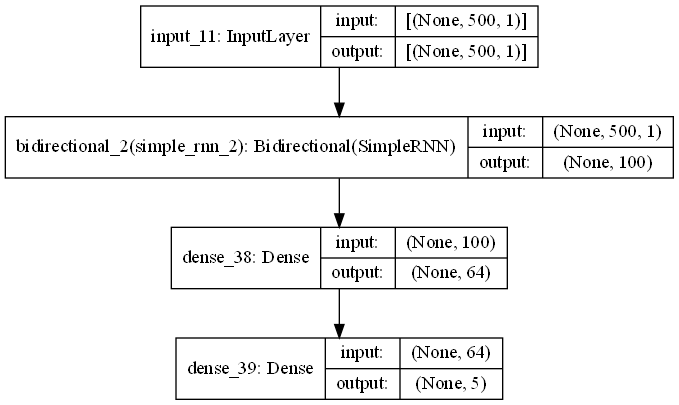

In [39]:
plot_model(rnn_will, show_shapes=True)

In [40]:
rnn_will.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

rnn_w = rnn_will.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 116024 samples, validate on 29007 samples
Epoch 1/20
116024/116024 [==============================] - 248s 2ms/sample - loss: 1.3548 - acc: 0.4609 - val_loss: 1.3562 - val_acc: 0.4594
Epoch 2/20
116024/116024 [==============================] - 293s 3ms/sample - loss: 1.3502 - acc: 0.4600 - val_loss: 1.3338 - val_acc: 0.4594
Epoch 3/20
116024/116024 [==============================] - 228s 2ms/sample - loss: 1.3320 - acc: 0.4610 - val_loss: 1.3318 - val_acc: 0.4594
Epoch 4/20
116024/116024 [==============================] - 221s 2ms/sample - loss: 1.3335 - acc: 0.4617 - val_loss: 1.3318 - val_acc: 0.4595
Epoch 5/20
116024/116024 [==============================] - 201s 2ms/sample - loss: 1.3329 - acc: 0.4626 - val_loss: 1.3621 - val_acc: 0.4593
Epoch 6/20
116024/116024 [==============================] - 203s 2ms/sample - loss: 1.3297 - acc: 0.4637 - val_loss: 1.3229 - val_acc: 0.4628
Epoch 7/20
116024/116024 [==============================] - 205s 2ms/sample - loss: 1.3251 - acc:

145031/145031 [==============================] - 94s 647us/sample - loss: 1.3203 - acc: 0.4642
Overall accuracy for training dataset: 46.41973078250885%
Overall accuracy for testing dataset: 46.72844707965851%


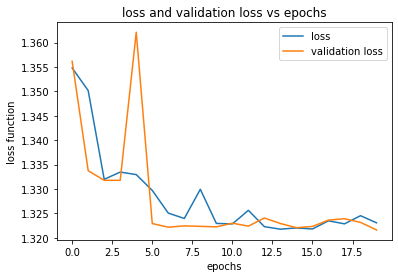

In [41]:
misc,testacc = rnn_will.evaluate(x_test,y_test)
misc,trainacc = rnn_will.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(rnn_w.history['loss'],label="loss")
plt.plot(rnn_w.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

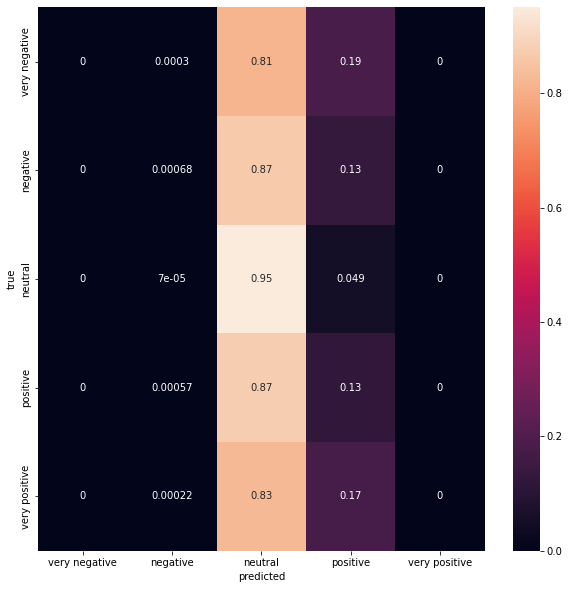

In [42]:
predicted = rnn_will.predict(x_test)
matrix = confusion_matrix(y_test,predicted.argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

#  LSTM (Long Short-Term Memory)

In [49]:
inputs = Input(shape=(shape,1))
bi = Bidirectional(LSTM(50))(inputs)
dense1 = Dense(64, activation='relu')(bi)
output = Dense(len(labels),activation='softmax')(dense1)
lstm_will = Model(inputs,output)

lstm_will.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 500, 1)]          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100)               20800     
_________________________________________________________________
dense_48 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_49 (Dense)             (None, 5)                 325       
Total params: 27,589
Trainable params: 27,589
Non-trainable params: 0
_________________________________________________________________


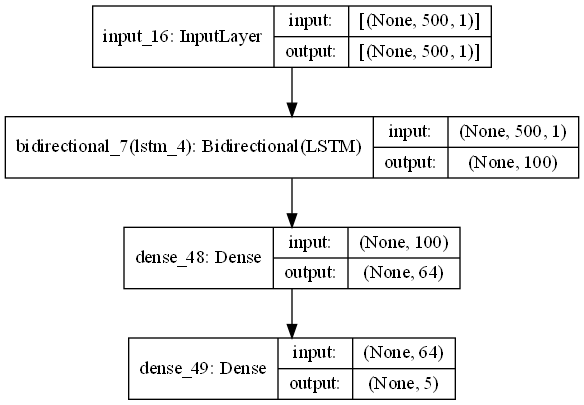

In [50]:
plot_model(lstm_will, show_shapes=True)

In [51]:
lstm_will.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

lstm_w = lstm_will.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 116024 samples, validate on 29007 samples
Epoch 1/20
116024/116024 [==============================] - 582s 5ms/sample - loss: 1.3345 - acc: 0.4637 - val_loss: 1.3236 - val_acc: 0.4626
Epoch 2/20
116024/116024 [==============================] - 567s 5ms/sample - loss: 1.3219 - acc: 0.4650 - val_loss: 1.3233 - val_acc: 0.4619
Epoch 3/20
116024/116024 [==============================] - 570s 5ms/sample - loss: 1.3214 - acc: 0.4640 - val_loss: 1.3224 - val_acc: 0.4630
Epoch 4/20
116024/116024 [==============================] - 564s 5ms/sample - loss: 1.3207 - acc: 0.4645 - val_loss: 1.3224 - val_acc: 0.4634
Epoch 5/20
116024/116024 [==============================] - 566s 5ms/sample - loss: 1.3202 - acc: 0.4646 - val_loss: 1.3205 - val_acc: 0.4628
Epoch 6/20
116024/116024 [==============================] - 572s 5ms/sample - loss: 1.3199 - acc: 0.4646 - val_loss: 1.3209 - val_acc: 0.4624
Epoch 7/20
116024/116024 [==============================] - 606s 5ms/sample - loss: 1.3198 - acc:

145031/145031 [==============================] - 213s 1ms/sample - loss: 1.3168 - acc: 0.4659
Overall accuracy for training dataset: 46.585214138031006%
Overall accuracy for testing dataset: 46.61421775817871%


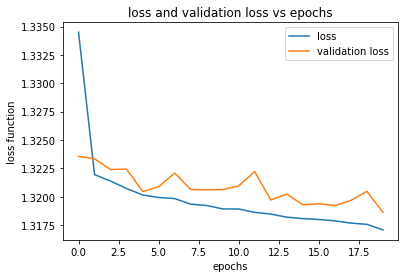

In [52]:
misc,testacc = lstm_will.evaluate(x_test,y_test)
misc,trainacc = lstm_will.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(lstm_w.history['loss'],label="loss")
plt.plot(lstm_w.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

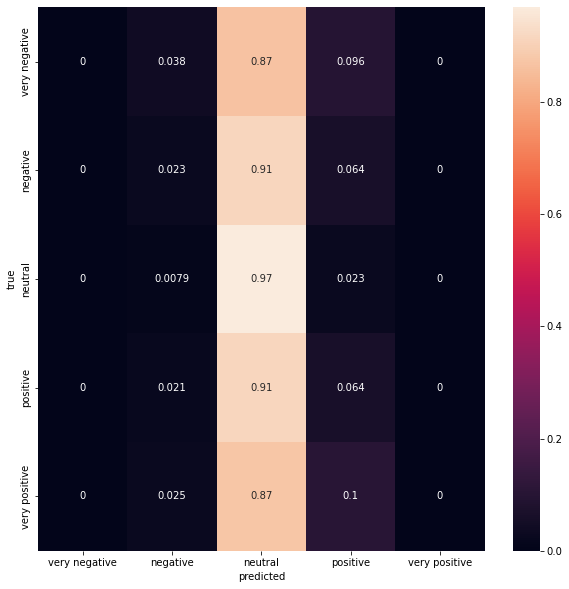

In [53]:
matrix = confusion_matrix(y_test,lstm_will.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

# Convolutional NN

In [54]:
inputs = Input(shape=(shape,1))
encoded_h1 = Conv1D(50,kernel_size=3, activation='relu')(inputs)
pool1 = MaxPool1D(pool_size=2)(encoded_h1)
encoded_h2 = Conv1D(40,kernel_size=3, activation='relu')(pool1)
pool2 = MaxPool1D(pool_size=2)(encoded_h2)
encoded_h3 = Conv1D(30,kernel_size=3, activation='relu')(pool2)
pool3 = MaxPool1D(pool_size=2)(encoded_h3)
flat = Flatten()(pool3)
data = Dense(20, activation='relu')(flat)
drop = Dropout(0.5)(data)
output = Dense(len(labels),activation='softmax')(drop)
cnn_will = Model(inputs,output)

cnn_will.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 500, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 498, 50)           200       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 249, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 247, 40)           6040      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 123, 40)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 121, 30)           3630      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 60, 30)            0  

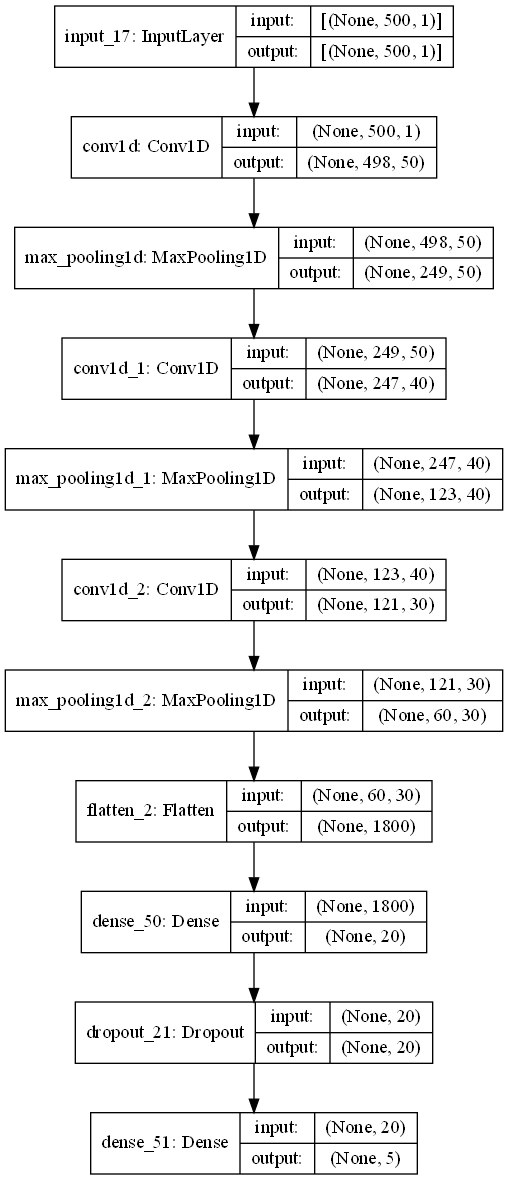

In [55]:
plot_model(cnn_will, show_shapes=True)

In [56]:
cnn_will.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn_w = cnn_will.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 116024 samples, validate on 29007 samples
Epoch 1/20
116024/116024 [==============================] - 44s 383us/sample - loss: 1.3520 - acc: 0.4596 - val_loss: 1.3254 - val_acc: 0.4594
Epoch 2/20
116024/116024 [==============================] - 43s 370us/sample - loss: 1.3318 - acc: 0.4617 - val_loss: 1.3248 - val_acc: 0.4594
Epoch 3/20
116024/116024 [==============================] - 43s 368us/sample - loss: 1.3292 - acc: 0.4617 - val_loss: 1.3357 - val_acc: 0.4594
Epoch 4/20
116024/116024 [==============================] - 44s 383us/sample - loss: 1.3286 - acc: 0.4617 - val_loss: 1.3243 - val_acc: 0.4594
Epoch 5/20
116024/116024 [==============================] - 43s 373us/sample - loss: 1.3281 - acc: 0.4617 - val_loss: 1.3208 - val_acc: 0.4594
Epoch 6/20
116024/116024 [==============================] - 42s 365us/sample - loss: 1.3269 - acc: 0.4617 - val_loss: 1.3203 - val_acc: 0.4594
Epoch 7/20
116024/116024 [==============================] - 45s 385us/sample - loss: 1.3260

145031/145031 [==============================] - 17s 120us/sample - loss: 1.3050 - acc: 0.4612
Overall accuracy for training dataset: 46.124622225761414%
Overall accuracy for testing dataset: 46.17822468280792%


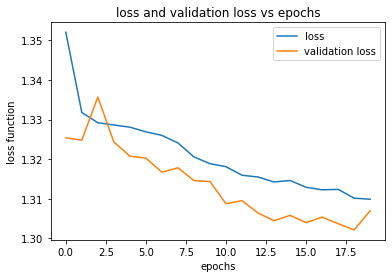

In [57]:
misc,testacc = cnn_will.evaluate(x_test,y_test)
misc,trainacc = cnn_will.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(cnn_w.history['loss'],label="loss")
plt.plot(cnn_w.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

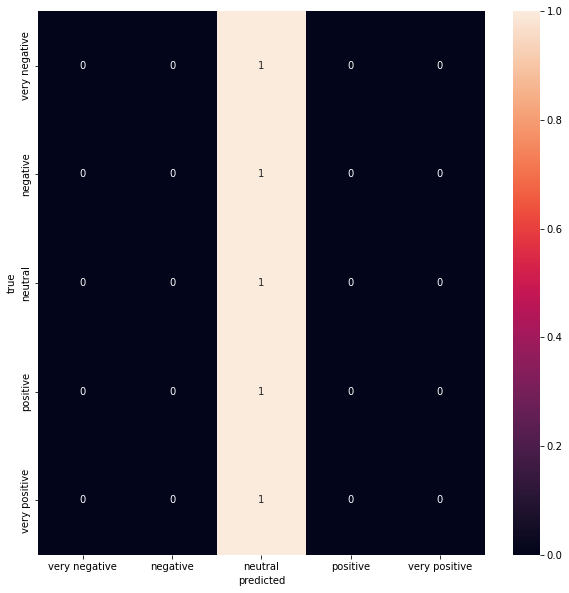

In [58]:
matrix = confusion_matrix(y_test,cnn_will.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

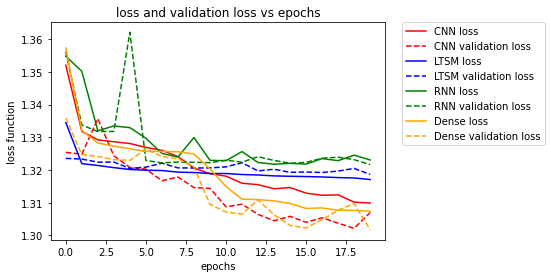

In [60]:
plt.plot(cnn_w.history['loss'], label="CNN loss", color = 'red')
plt.plot(cnn_w.history['val_loss'],'--',label="CNN validation loss", color = 'red')
plt.plot(lstm_w.history['loss'],label="LTSM loss", color = 'blue')
plt.plot(lstm_w.history['val_loss'],'--',label="LTSM validation loss",color = 'blue')
plt.plot(rnn_w.history['loss'],label="RNN loss", color = 'green')
plt.plot(rnn_w.history['val_loss'],'--',label="RNN validation loss",color = 'green')
plt.plot(dense_w.history['loss'],label="Dense loss",color = 'orange')
plt.plot(dense_w.history['val_loss'],'--',label="Dense validation loss",color = 'orange')
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()